# Eye Image Processing

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def eye_limit(at, bt, ct, ab, bb, cb):
    a = at - ab
    b = bt - bb
    c = ct - cb
    x1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    x2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    return x1, x2

We firstly load the image and crop out eyebrow regions

For referencing:
* `76.png`, `207.png` is a good closing eye image
* `100.png`, `123.png` is a good opening eye image

In [68]:
filename = "eyes/brio/35.png"

In [74]:
eye = cv2.imread(filename)
img_length = eye.shape[0]
eye = eye[round(img_length*0.2):round(img_length*0.8), :]
rgb_eye = cv2.cvtColor(eye, cv2.COLOR_BGR2RGB)

Then we do an adaptive threshold on the enhanced difference between two channels. The result is the blurred and thresholed again to smooth out contours

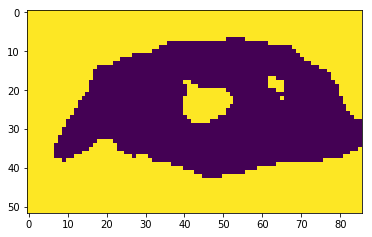

In [75]:
chan_diff = (eye[:, :, 2] - eye[:, :, 0]) * 3
_, chan_th = cv2.threshold(chan_diff, 100, 255, cv2.THRESH_BINARY)
chan_th = cv2.blur(chan_th, (6, 6))
_, chan_th = cv2.threshold(chan_th, 100, 255, cv2.THRESH_BINARY)
plt.imshow(chan_th)
plt.show()

We then determine the top highest amount of the dot, and construct a second-order equation

In [71]:
xt = np.arange(0, chan_th.shape[1])
yt = np.argmin(chan_th, axis=0)
upper_data_points = np.vstack([xt, yt]).T
upper_data_points = upper_data_points[upper_data_points[:, 1] != 0]

In [72]:
reversed_chan_th = chan_th[::-1, :]
xb = np.arange(0, reversed_chan_th.shape[1])
yb = chan_th.shape[0] - np.argmin(reversed_chan_th, axis=0)
lower_data_points = np.vstack([xb, yb]).T
lower_data_points = lower_data_points[lower_data_points[:, 1] != chan_th.shape[0]]

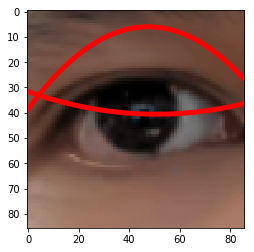

In [73]:
at, bt, ct = np.polyfit(upper_data_points[:, 0], upper_data_points[:, 1], deg=2)
ab, bb, cb = np.polyfit(lower_data_points[:, 0], lower_data_points[:, 1], deg=2)

plt.imshow(rgb_eye)
plt.plot(xt, at*xt**2 + bt*xt + ct, linewidth=5, c="red")
plt.plot(xb, ab*xb**2 + bb*xb + cb, linewidth=5, c="red")
plt.show()

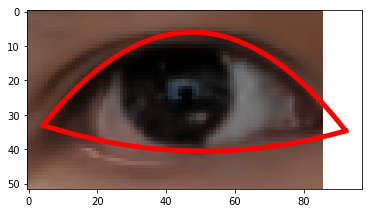

In [65]:
xl, xr = eye_limit(at, bt, ct, ab, bb, cb)
yl = at*xl**2 + bt*xl + ct
yr = at*xr**2 + bt*xr + ct
rgb_eye = cv2.cvtColor(eye, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_eye)
x = np.linspace(xl, xr, 1000)
plt.plot(x, at*x**2 + bt*x + ct, linewidth=5, c="red")
plt.plot(x, ab*x**2 + bb*x + cb, linewidth=5, c="red")
plt.show()